In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [86]:
laligadf = pd.read_pickle('laligadfmod')
laligadf = laligadf.drop('index',axis=1)
y=laligadf['outcome']
X=laligadf.loc[:, laligadf.columns!='outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.5, 
                                                    shuffle=True, stratify=y)
X_train

x     y  end_x  end_y  aerial_won  follows_dribble  first_time  \
700    89.3  31.6  118.7   39.6           0                0           0   
957   113.2  52.1  120.0   36.0           0                0           0   
3267   97.8  23.8  120.0   41.8           0                0           1   
2496  105.3  41.1  120.0   43.8           0                0           1   
2662   98.2  31.7  115.2   41.0           0                0           1   
...     ...   ...    ...    ...         ...              ...         ...   
1202  113.1  33.4  116.7    0.1           0                0           1   
2223   92.0  49.1  118.4   39.4           0                0           1   
4377   96.0  31.4  107.1   34.1           0                0           1   
3576  104.7  29.8  108.3   32.6           0                0           0   
1556  116.0  29.0  120.0   38.0           0                0           1   

      open_goal  deflected        xg  ...  type_Free Kick  type_Open Play  \
700           0          0  0.016307  ...               0               1   
957           0          0  0.052877  ...               0               1   
3267          0          0  0.018484  ...               0               1   
2496          0          0  0.199043  ...               0               1   
2662          0          0  0.075895  ...               0               1   
...         ...        ...       ...  ...             ...             ...   
1202          0          0  0.162510  ...               0               1   
2223          0          0  0.014248  ...               0               1   
4377          0          0  0.010806  ...               0               1   
3576          0          0  0.051515  ...               0               1   
1556          0          0  0.104112  ...               0               1   

      type_Penalty  technique_Backheel  technique_Diving Header  \
700              0                   0                        0   
957              0                   0                        0   
3267             0                   0                        0   
2496             0                   0                        0   
2662             0                   0                        0   
...            ...                 ...                      ...   
1202             0                   0                        0   
2223             0                   0                        0   
4377             0                   0                        0   
3576             0                   0                        0   
1556             0                   0                        0   

      technique_Half Volley  technique_Lob  technique_Normal  \
700                       0              0                 1   
957                       0              0                 1   
3267                      0              0                 1   
2496                      0              0                 0   
2662                      0              0                 1   
...                     ...            ...               ...   
1202                      0              0                 0   
2223                      0              0                 1   
4377                      0              0                 0   
3576                      0              0                 1   
1556                      0              0                 0   

      technique_Overhead Kick  technique_Volley  
700                         0                 0  
957                         0                 0  
3267                        0                 0  
2496                        0                 1  
2662                        0                 0  
...                       ...               ...  
1202                        0                 1  
2223                        0                 0  
4377                        0                 1  
3576                        0                 0  
1556                        0                 1 

# Histogram- based Gradient Boosting

In [53]:
boost = GradientBoostingClassifier(learning_rate=0.1,random_state=42,verbose=10)
boost.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [54]:
param_grid  = [{'max_depth': [list(range(1,20)),None]},
               {'min_samples_leaf': [5,10,15,20,25,30]},
               {'n_estimators': [100,200,300,400,500]}]
gs = GridSearchCV(estimator=boost,
                    n_jobs=-1,
                    param_grid=param_grid,
                    scoring='accuracy',)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100))           

      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         1           0.5973            3.44s
         1           0.5973            4.68s
         2           0.4971            2.59s
         1           0.5973            4.58s
         2           0.4971            3.26s
         2           0.4971            2.94s
      Iter       Train Loss   Remaining Time 
         3           0.4252            2.77s
      Iter       Train Loss   Remaining Time 
         3           0.4252            3.00s
         4           0.3690            2.68s
      Iter       Train Loss   Remaining Time 
         1           0.5973            2.90s
      Iter       Train Loss   Remaining Time 
         4           0.3690            3.03s

/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 663, in _fit_stages
    raw_pre

      Iter       Train Loss   Remaining Time 
         1           0.7109            0.98s
         2           0.6531            0.88s
         3           0.6149            0.87s
         4           0.5774            0.84s
         5           0.5475            0.83s
         6           0.5221            0.81s
         7           0.4981            0.79s
         8           0.4771            0.78s
         9           0.4483            0.76s
        10           0.4305            0.75s
        11           0.4085            0.75s
        12           0.3952            0.74s
        13           0.3844            0.74s
        14           0.3732            0.73s
        15           0.3645            0.72s
        16           0.3509            0.71s
        17           0.3432            0.70s
        18           0.3321            0.69s
        19           0.3232            0.68s
        20           0.3175            0.67s
        21           0.3107            0.67s
        2

In [4]:
boost = HistGradientBoostingClassifier(learning_rate=0.1,random_state=42,verbose=10)
param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7,8],
               'min_samples_leaf': [35,36,37,38,39,40,41,42]}]
gs = GridSearchCV(estimator=boost,
                    n_jobs=2,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=10)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100))  

Binning 0.009 GB of training data: Binning 0.009 GB of training data: 0.039 s
0.039 s
Fitting gradient boosted rounds:
Fitting gradient boosted rounds:
[1/100] [1/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[2/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[2/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[3/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[3/100] 1 tree, 2 leaves, max depth = 1, in 0.002s
[4/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[4/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[5/100] 1 tree, 2 leaves, max depth = 1, in 0.002s
[5/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[6/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[6/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[7/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[7/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[8/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[8/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[9/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[9/100] 1 tree, 2 leaves

/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


1 tree, 6 leaves, max depth = 3, in 0.004s
[99/100] 1 tree, 6 leaves, max depth = 3, in 0.005s
[100/100] 1 tree, 7 leaves, max depth = 3, in 0.004s
Fit 100 trees in 0.682 s, (686 total leaves)
Time spent computing histograms: 0.227s
Time spent finding best splits:  0.035s
Time spent applying splits:      0.058s
Time spent predicting:           0.006s
Binning 0.009 GB of training data: 0.044 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 7 leaves, max depth = 3, in 0.005s
[2/100] 1 tree, 6 leaves, max depth = 3, in 0.006s
[3/100] 1 tree, 5 leaves, max depth = 3, in 0.006s
[4/100] 1 tree, 6 leaves, max depth = 3, in 0.005s
[5/100] 1 tree, 6 leaves, max depth = 3, in 0.006s
[6/100] 1 tree, 6 leaves, max depth = 3, in 0.023s
[7/100] 1 tree, 7 leaves, max depth = 3, in 0.009s
[8/100] 1 tree, 7 leaves, max depth = 3, in 0.005s
[9/100] 1 tree, 6 leaves, max depth = 3, in 0.005s
[10/100] 1 tree, 7 leaves, max depth = 3, in 0.005s
[11/100] 1 tree, 6 leaves, max depth = 3, in 0.005s
[12/100]

In [55]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
m = 8
n = 8
X = np.reshape(gs.cv_results_['param_max_depth'].data,[n,m])
Y = np.reshape(gs.cv_results_['param_min_samples_leaf'].data,[n,m])
Z = np.reshape(gs.cv_results_['mean_test_score'],[n,m])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X,Y,Z)
plt.show()


ValueError: cannot reshape array of size 13 into shape (8,8)

#### After replacing the min samples leaf, we found 38 to be the best and max depth did not really change much as we changed it around.

# Next we will look at Random Forest

In [56]:
Rforest = RandomForestClassifier(random_state=42)
Rforest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [57]:
Rforest = RandomForestClassifier()

In [58]:
param_grid = [{'n_estimators': [100,200,300,400],
              'criterion': ['gini','entropy']}]
gs = GridSearchCV(estimator=Rforest,
                param_grid=param_grid,
                n_jobs=-1,
                cv=10)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100)) 

Best Accuracy: 92.04%
Best Params: {'criterion': 'entropy', 'n_estimators': 100}
Test Accuracy: 92.84%


In [59]:
param_grid = [{'n_estimators': [20,40,60,80],
              'criterion': ['gini','entropy']}]
gs = GridSearchCV(estimator=Rforest,
                param_grid=param_grid,
                n_jobs=-1,
                cv=10)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100)) 

Best Accuracy: 92.22%
Best Params: {'criterion': 'gini', 'n_estimators': 40}
Test Accuracy: 92.00%


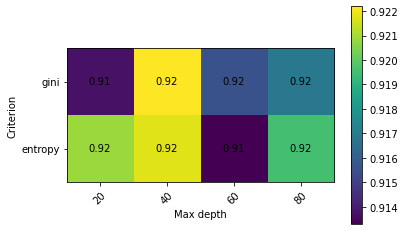

In [60]:
from mlxtend.plotting import heatmap
grid = np.zeros((2, 4))
grid[0, :] = gs.cv_results_['mean_test_score'][:4]
grid[1, :] = gs.cv_results_['mean_test_score'][4:]


heatmap(grid, 
        column_names=[20,40,60,80], 
        row_names=['gini', 'entropy'])
plt.ylabel('Criterion')
plt.xlabel('Max depth')
plt.show()

#### We have looked at a few ensemble methods and thought knn could also be useful in this project.

# NCA
#### We have individual players as a column so we thought reducing dimensionality would help in predicting goals.

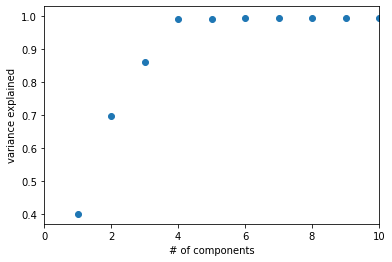

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Here we looked for the least amount of principal components to explain the most amount of explained variance.
mod = PCA(n_components=len(X_test.columns))
mod.fit(X_train,y_train)
a=mod.explained_variance_ratio_.cumsum() #variance explained
b=range(1,len(X_test.columns)+1) #num of components
plt.xlim([0,10])
plt.xlabel('# of components')
plt.ylabel('variance explained')
plt.scatter(b,a)

#### Based off the graph, there wasn't much improvement in explained variance after 4 principal components so 4 components seem best. 

In [89]:
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=4, random_state=42),
)
knn = KNeighborsClassifier()

param_grid = [{'n_neighbors': [46,47,48,49]}]

gs = GridSearchCV(estimator = knn, param_grid=param_grid, cv=10)

nca.fit(X_train, y_train)

gs.fit(nca.transform(X_train),y_train)

acc_knn = gs.score(nca.transform(X_test), y_test)

print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 46}
0.9039662698412698


# Logistic Regression
#### Since the target is either goal or no goal logistic regression would work here

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42,verbose=10,class_weight='balanced')
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [92]:
param_grid = [{'C': [0.1,0.5,1]}]
gs = GridSearchCV(estimator=logreg,
                  param_grid=param_grid,
                  cv=10,
                  n_jobs=2)
gs.fit(X_train,y_train)
print('best parameters:', gs.best_params_)
print('best accuracy')
print('Best test accuracy: ', gs.best_estimator_(X_test,y_test)*100)